# hierarchical clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data= pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,[1,6,7,8,9,10]])
df_norm.head()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451084,-0.702698,-1.103926,-0.328562,-0.362123,1.395280
1,-0.539389,-0.701001,-0.999801,-0.328562,-0.362123,1.379784
2,-0.319991,-0.539185,-0.791550,-0.328562,-0.362123,1.411744
3,-0.583726,-0.689200,-1.103926,-0.328562,-0.362123,1.372037
4,0.239648,1.082986,1.499207,1.154788,0.692404,1.363805


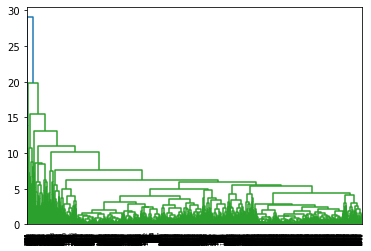

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
data['h_clusterid']=pd.Series(y_hc)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [10]:
result=data.iloc[:,1:].groupby(data.h_clusterid).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,69563.876258,142.42002,2.052062,1.014588,1.012324,16845.678320,11.505282,436.073944,1.307847,4109.533954,0.367203,0
1,131999.500000,347.00000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,1
2,906196.789474,456.00000,3.526316,1.000000,1.000000,69541.368421,19.684211,1373.315789,5.052632,6411.105263,0.894737,2


# K means Clustering

In [11]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [12]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [13]:
# Normalization function 
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df_nor = norm_fun(data.iloc[:,[1,6,7,8,9,10]])
df_nor.describe()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.065020,0.134906,0.014929,0.025917,0.496330
std,0.059112,0.091590,0.111672,0.045436,0.071569,0.248991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.004741,0.034884,0.000000,0.000000,0.280685
50%,0.025279,0.027195,0.139535,0.000000,0.000000,0.493610
75%,0.054201,0.090261,0.197674,0.010092,0.018868,0.697914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
kmeans_clust=KMeans(n_clusters=16)
kmeans_clust.fit(df_nor)

KMeans(n_clusters=16)

In [19]:
kmeans_clust.labels_

array([ 3,  3,  3, ..., 12, 15, 15])

In [20]:
#kmeans_clust.cluster_centers_[2].reshape(1,6).shape

In [21]:
data["clusterID"]=pd.Series(kmeans_clust.labels_)

result=data.iloc[:,1:].groupby(data.clusterID).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID
clusterID,,,,,,,,,,,,,
0,187932.292683,240.743902,4.609756,1.024390,1.341463,86244.792683,29.658537,1012.207317,3.231707,4267.634146,0.780488,0.073171,0
1,81622.117647,114.016807,2.899160,1.029412,1.006303,23415.052521,16.586134,194.821429,0.571429,3896.157563,0.443277,0.000000,1
2,44604.631714,67.166240,1.076726,1.005115,1.000000,3136.421995,3.913043,159.355499,0.519182,3305.368286,0.222506,0.000000,2
3,52927.319218,50.000000,1.065147,1.000000,1.000000,2598.143322,3.042345,224.641694,0.605863,6898.241042,0.270358,0.000000,3
4,81511.045455,153.118182,3.100000,1.027273,1.009091,34660.136364,30.581818,700.745455,2.090909,2065.027273,0.509091,0.000000,4
5,144746.849785,236.540773,4.309013,1.004292,1.025751,53315.291845,19.725322,430.454936,1.223176,5755.755365,0.690987,0.034335,5
6,16368.284314,109.681373,1.093137,1.004902,1.000000,3089.901961,3.156863,183.465686,0.455882,624.460784,0.088235,0.000000,6
7,152874.642857,482.035714,1.964286,1.071429,1.000000,35244.750000,38.928571,9986.678571,28.035714,2985.107143,0.892857,0.142857,7
8,42868.605322,130.490022,1.097561,1.004435,1.000000,3304.509978,4.135255,212.944568,0.616408,4841.208426,0.232816,0.000000,8


In [22]:
k = list(range(2,25))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_nor)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_nor.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_nor.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    

TWSS when k is 2 [762.45876072]
TWSS when k is 3 [663.16644329]
TWSS when k is 4 [623.99584623]
TWSS when k is 5 [581.01048113]
TWSS when k is 6 [560.83132141]
TWSS when k is 7 [531.01418399]
TWSS when k is 8 [504.53718811]
TWSS when k is 9 [486.51950099]
TWSS when k is 10 [464.55294125]
TWSS when k is 11 [453.00283479]
TWSS when k is 12 [448.51967639]
TWSS when k is 13 [436.84447748]
TWSS when k is 14 [434.2252542]
TWSS when k is 15 [419.90373705]
TWSS when k is 16 [408.02531802]
TWSS when k is 17 [411.063347]
TWSS when k is 18 [397.47933337]
TWSS when k is 19 [391.48627275]
TWSS when k is 20 [380.49950452]
TWSS when k is 21 [378.28665791]
TWSS when k is 22 [373.22765023]
TWSS when k is 23 [363.74720834]
TWSS when k is 24 [359.15205316]


Text(0, 0.5, 'total_within_SS')

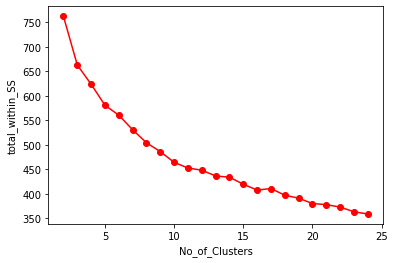

In [23]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

# DBSCAN

In [24]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("EastWestAirlines.csv");

print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [27]:
array=df.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [28]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [29]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [30]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [32]:
data1=pd.concat([df,cl],axis=1)
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
result1=data1.iloc[:,1:].groupby(data1.cluster).mean()
result1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
cluster,,,,,,,,,,,,
-1,152791.552775,624.389554,2.676823,1.055495,1.053319,34958.247008,19.709467,1655.563656,4.813928,4607.618063,0.642002,-1
0,48402.226494,0.463177,1.585456,1.000000,1.000000,7843.012969,7.915702,80.171839,0.276980,3797.680408,0.000000,0
1,51237.712984,1.708428,2.505695,1.000000,1.000000,20309.629841,11.949886,164.247153,0.534169,4465.339408,1.000000,1
2,221352.200000,0.000000,1.000000,1.000000,1.000000,12000.000000,3.400000,0.000000,0.000000,5603.200000,1.000000,2
3,148232.562500,0.000000,5.000000,1.000000,1.000000,60375.625000,14.062500,62.500000,0.125000,2629.125000,0.000000,3
4,30631.571429,0.000000,1.000000,2.000000,1.000000,7589.142857,12.000000,0.000000,0.000000,2266.857143,0.000000,4
5,50662.125000,0.000000,5.000000,1.000000,1.000000,58158.000000,17.500000,0.000000,0.000000,2585.250000,1.000000,5
6,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000,6
